In [7]:
import numpy as np
import matplotlib.pyplot as plt
from gplearn.gplearn.genetic import SymbolicRegressor
from load_data import load_data, load_stress_strain
from benchmarks import run_experiment, categorical_variables_per_dataset, create_categorical_variable_dict
from interpret.glassbox import ExplainableBoostingClassifier, ExplainableBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from collections import defaultdict
import pandas as pd
# from xgboost import XGBClassifier, XGBRegressor
import time
import pysr

In [2]:
global_seed = 42
def get_model(model,task,length=None):
    if model == 'xgb':
        if task == 'regression':
            return XGBRegressor()
        elif task == 'classification':
            return XGBClassifier()
    elif model == 'pysr':
        if task == 'regression':
            parameter_dict = {
                'binary_operators':["+", "*", "/", "-"],
                'unary_operators':[
                    "log",
                    "exp",
                    "cos",
                ],
                'loss':"L2DistLoss()",
                'maxsize':length,
                'procs':0,
                'multithreading':False,
                'populations':15,
                'niterations':400,
                'population_size':33,
                'model_selection':'accuracy',
                'random_state':global_seed,
                'deterministic':True
            }
            return pysr.PySRRegressor(**parameter_dict)
        elif task == 'classification':
            raise ValueError()

In [3]:
task = 'regression'

dataset_name = 'stress_strain'

df = load_data('stress_strain')

X = df[['Strain']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_min = X_org.min()
# X_max = X_org.max()

# X = sc_X.fit_transform(X_org)
# y = sc_y.fit_transform(y_org).reshape(-1)

# lengths = [5,10,20,40]
# lengths = [10,15,20,25]
# models = {}

length = 25

model = get_model('pysr',task,length)
model.fit(X_train,y_train)

C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pysr\sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pysr\julia_helpers.py:139: UserWarning: `torch` was loaded before the Julia instance started. This may cause a segfault when running `PySRRegressor.fit`. To avoid this, please run `pysr.julia_helpers.init_julia()` *before* importing `torch`. For updates, see https://github.com/pytorch/pytorch/issues/78829
  warnings.warn(


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          58.354744   
	1         0.001521                               (58.426434 - Strain)   
	2         0.166513                           (63.26248 / exp(Strain))   
	3         0.399641                ((Strain * -285.22687) - -78.79336)   
	4         0.317204              (cos(Strain * 7.7813773) * 74.902084)   
	5         0.099284   (cos(Strain / (Strain + -0.2774532)) * 71.15296)   
	6         0.008795  ((cos(exp(Strain) * 6.0501447) + -0.53034693) ...   
	7         0.131199  ((cos((0.050053578 - Strain) * -8.578677) + -0...   
	8         0.725110  (((cos(log(Strain) * -0.07111955) + -0.7564094...   
	9         0.312107  ((cos((log(Strain) - (Strain * 44.28688)) * 0....   
	10        0.003008  ((cos((log(Strain / 0.85937274) - (Strain * 44...   
	11        0.879954  ((cos((7.2326336 - cos(exp(Strain * -420.9701)...   
	12        0.004833  ((cos((7.2326336 - cos(exp((Strain * -420.9701...   
	13        0.015387  (((cos((7.232092 - cos(exp(Strain * -345.91092...   
	14        0.079801  (((cos((7.162485 - cos(exp((Strain * -345.9124...   
	15        0.001180  ((((cos((7.162485 - cos(exp((Strain * -345.912...   
	16        0.000317  ((((cos((7.162485 - cos(exp((Strain * -345.912...   
	17  >>>>  0.168320  (exp(exp(1.4557954 - (Strain * 1.3054712))) * ...   
	
	          loss  complexity  
	0   524.200740           1  
	1   522.608200           3  
	2   442.446380           4  
	3   296.687070           5  
	4   216.042200           6  
	5   177.133850           8  
	6   175.582810           9  
	7   153.993700          10  
	8    74.574750          11  
	9    39.948406          13  
	10   39.708790          15  
	11   16.471285          16  
	12   16.312834          18  
	13   15.818466          20  
	14   14.605186          21  
	15   14.570756          23  
	16   14.561521          25  
	17   12.305705          26  
]

In [9]:
n_equations = 18
res = []
for i in range(n_equations):
    res.append(r2_score(y_test,model.predict(X_test,i)))

In [30]:
res[12]

0.9698554256786489

In [35]:
print(model.latex(4))

74.9 \cos{\left(7.78 Strain \right)}


In [3]:
task = 'regression'

dataset_name = 'stress_strain'

sc_X = StandardScaler()
sc_y = StandardScaler()

df = load_data('stress_strain')

X_org = df[['Strain']]
y_org = df[['target']]

X_min = X_org.min()
X_max = X_org.max()

X = sc_X.fit_transform(X_org)
y = sc_y.fit_transform(y_org).reshape(-1)

# lengths = [5,10,20,40]
lengths = [10,15,20,25]
models = {}

for length in lengths:
    model = get_model('pysr',task,length)
    model.fit(X,y)
    models[length] = model


C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\julia_helpers.py:139: UserWarning: `torch` was loaded before the Julia instance started. This may cause a segfault when running `PySRRegressor.fit`. To avoid this, please run `pysr.julia_helpers.init_julia()` *before* importing `torch`. For updates, see https://github.com/pytorch/pytorch/issues/78829
  warnings.warn(
C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\sr.py:1257

C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


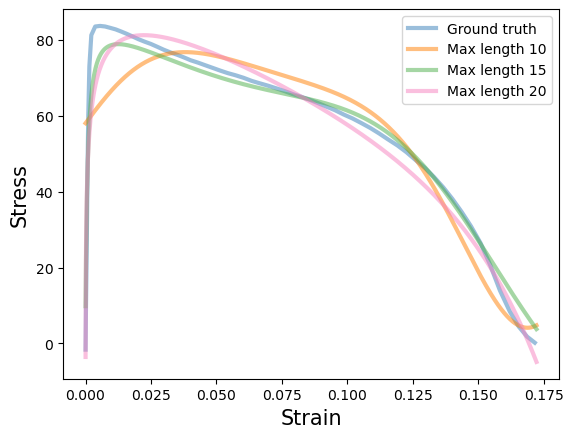

In [14]:
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']
linewidth = 3.0
alpha = 0.5
markersize = 5.0
label_fontsize = 15
lengths = [10,15,20]
plt.plot()
plt.plot(X_org[::10],y_org[::10], '-', c=colors[0], markersize=markersize,linewidth=linewidth, alpha=alpha, label='Ground truth')

for i, length in enumerate(lengths):
    model = models[length]
    t = np.linspace(X_min,X_max,1000)
    T = t.reshape(-1,1)
    T_trans = sc_X.transform(T)
    y_pred = sc_y.inverse_transform(model.predict(T_trans).reshape(-1,1)).reshape(-1)
    plt.plot(t,y_pred,c=colors[i+1],linewidth=linewidth, alpha=alpha, label=f"Max length {length}")
plt.xlabel('Strain', fontsize=label_fontsize)
plt.ylabel('Stress', fontsize=label_fontsize)
# plt.xscale('log')
plt.legend()
plt.savefig('sr_fails.pdf')

In [8]:
for length in lengths:
    model = models[length]
    print(model.sympy())
    print(model.latex())
    print("-"*20)

-0.4838337*x0 + cos(x0**2) - 0.42902564744781
- 0.484 x_{0} + \cos{\left(x_{0}^{2} \right)} - 0.429
--------------------
-x0 + 0.7413008*cos(x0 - cos(x0)) - 0.057454807611312/(x0 + 1.3551172)
- x_{0} + 0.741 \cos{\left(x_{0} - \cos{\left(x_{0} \right)} \right)} - \frac{0.0575}{x_{0} + 1.36}
--------------------
-0.04382756*x0*exp(1.5508696*x0) - x0 + 0.6804873*log(log(x0 + 1.5508696) + 1.5508696)
- 0.0438 x_{0} e^{1.55 x_{0}} - x_{0} + 0.681 \log{\left(\log{\left(x_{0} + 1.55 \right)} + 1.55 \right)}
--------------------
-0.5559469*exp(x0) + 1.37766285945361*cos(0.21196046 - 0.56881034/(12.3810832147427*x0 + 16.7189269585099)) - 0.299785064833363
- 0.556 e^{x_{0}} + 1.38 \cos{\left(0.212 - \frac{0.569}{12.4 x_{0} + 16.7} \right)} - 0.300
--------------------


AttributeError: 'PySRRegressor' object has no attribute 'best_equation'

In [5]:
task = 'regression'
dataset_names = ['stress_strain']
global_seed = 0
model_names = ['xgb','pysr']

# First test all datasets
# for i, dataset_name in enumerate(dataset_names):
#     if i < 30:
#         continue
#     model = LinearRegression()
#     run_experiment(dataset_name, model, None, task, random_state=global_seed)

results = defaultdict(list)
for dataset_name in dataset_names:
    results['dataset_name'].append(dataset_name)
    for model_name in model_names:
        model = get_model(model_name,task)
        t1 = time.time()
        score_mean, score_std = run_experiment(dataset_name, model, None, task, random_state=global_seed)
        t2 = time.time()
        results[f'{model_name}_mean'].append(score_mean)
        results[f'{model_name}_std'].append(score_std)
        results[f'{model_name}_time'].append(t2-t1)
        
df = pd.DataFrame(results)
    

    

10it [00:00, 14.13it/s]
0it [00:00, ?it/s]C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\sr.py:1215: UserWarning: Note: Setting `random_state` without also setting `deterministic` to True and `procs` to 0 will result in non-deterministic searches. 
  warnings.warn(
C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\julia_helpers.py:139: UserWarning: `torch` was loaded before the Julia instance started. This may cause a segfault when running `PySRRegressor.fit`. To avoid this, please run `pysr.julia_helpers.init_julia()` *before* importing `torch`. For updates, see https://github.com/pytorch/pytorch/issues/78829
  warnings.warn(
1it [00:41, 41.77s/it]C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\sr.py:1215: UserWarning: Note: Setting `random_state` without also setting `deter

In [6]:
df

,dataset_name,xgb_mean,xgb_std,xgb_time,pysr_mean,pysr_std,pysr_time
0,stress_strain,0.981797,0.053731,0.716897,0.920131,0.056593,126.245818


In [6]:
model

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                                 x0   
	1        0.246906                                            sin(x0)   
	2        0.005211                                   (x0 * 0.5543091)   
	3        0.513018                                 log(x0 + 1.427377)   
	4        0.305602                  (-0.118532754 / (x0 + 1.3478292))   
	5        0.126188                       ((x0 + 0.7830945) / exp(x0))   
	6        1.506495    ((-0.27010724 / (x0 + 1.3774464)) + 0.65499437)   
	7        0.015955           (sin(x0 + 1.0151263) / (x0 + 1.3974577))   
	8  >>>>  0.084274  (sin((x0 + 0.99540925) * 0.8221157) / (x0 + 1....   
	
	       loss  complexity  
	0  0.891385           1  
	1  0.696363           2  
	2  0.692743           3  
	3  0.414736           4  
	4  0.305527           5  
	5  0.269307           6  
	6  0.059701           7  
	7  0.058756           8  
	8  0.049643          10  
]

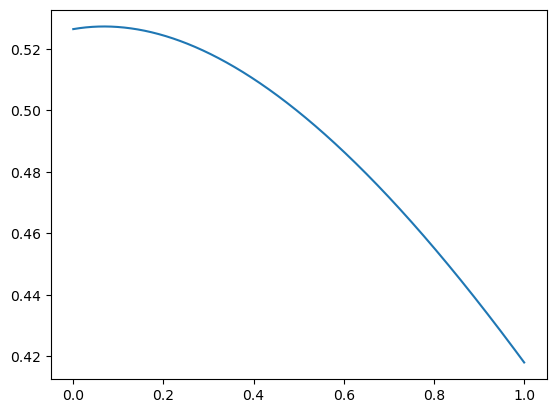

In [15]:

plt.plot(t,model.predict(X_t))

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [5]:
df = load_data('stress_strain')

In [6]:
X = df[['Strain']]
y = df[['target']]

In [7]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

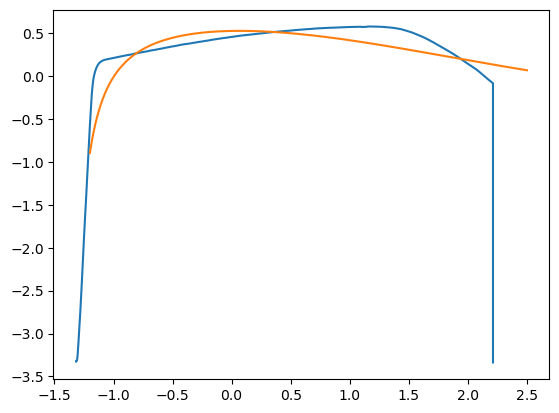

In [24]:
t = np.linspace(-1.2,2.5,1000)
X_t = t.reshape(-1,1)
plt.plot(X.reshape(-1),y.reshape(-1))
plt.plot(t,model.predict(X_t))

In [8]:
y[-1]

array([-0.08981417])

In [14]:
df.index[-1]

617

In [39]:
indexes = [0,1,2,3,4,5]
dfs = []
for i in indexes:
    dfs.append(load_stress_strain(i))

In [63]:
def plot_subplot(ax, df):
    ax.plot(df['Strain'],df['target'], linewidth=linewidth)
    ax.set_xlabel('Strain', fontsize=label_fontsize)
    ax.set_ylabel('Stress', fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=15)

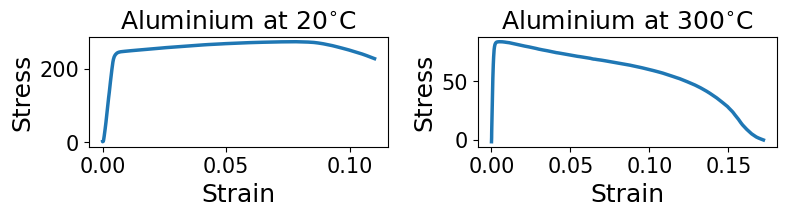

In [72]:
# visualize the shape functions
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']
linewidth = 2.5
alpha = 0.5
markersize = 5.0
label_fontsize = 18
title_fontsize = 18

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2))
plot_subplot(ax1,dfs[0])
plot_subplot(ax2,dfs[5])

ax1.title.set_text(r'Aluminium at $20 ^{\circ}$C')
ax2.title.set_text(r'Aluminium at $300 ^{\circ}$C')
ax1.title.set_fontsize(title_fontsize)
ax2.title.set_fontsize(title_fontsize)
ax1.set_xticks([0.000,0.050,0.100])

plt.subplots_adjust(left=0.12, bottom=0.30, right=0.98, top=0.85, wspace=0.3, hspace=None)


# plt.savefig("sample_stress_strain_curves.pdf")